<a href="https://colab.research.google.com/github/TIN310/TTNT/blob/main/2001230811_Ph%E1%BA%A1m_Tr%C3%AD_T%C3%ADn__Bu%E1%BB%95i_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. K-Means  là một trong những thuật toán nổi tiếng và đơn giản nhưng đặc biệt hiệu quả trong bài toán học không giám sát (unsupervised learning).
*   Nó được sử dụng khi dữ liệu của bạn chưa được phân loại (chưa có nhãn)
*   Mục tiêu của thuật toán là chia nhỏ dữ liệu thành k nhóm (groups) dựa trên các đặc trưng được cung cấp. Các điểm dữ liệu trong cùng một nhóm sẽ có sự giống nhau về đặc điểm nhận dạng.
2. Ứng dụng của K-Means
Tài liệu đưa ra ví dụ minh họa và yêu cầu bài tập về ứng dụng như sau:Ví dụ trong tài liệu: Phân nhóm học sinh trong một lớp (ví dụ 50 người) thành 3 nhóm dựa trên chiều cao: "Cao", "Trung bình", "Thấp".

*    K-Means thường được dùng trong phân khúc khách hàng, nén ảnh, phát hiện gian lận,Phân loại văn bản/Tin tức, v.v.

3. Số lượng cụm là tham số k mà người dùng phải xác định trước.Trong ví dụ lý thuyết, tài liệu chọn chia lớp học thành 3 nhóm ($k=3$)7.Trong bài tập thực hành mẫu, số lượng cụm được cài đặt cứng là `n_cluster = 38`.

4. Thuật toán đo độ tương đồng giữa một điểm dữ liệu ($x_i$) và tâm cụm ($c_j$) bằng bình phương khoảng cách Euclide9.Công thức trong tài liệu: $d_{j}(x_{i},c_{j})=||x_{i}-c_{j}||_{2}^{2}$10.Trong code thực hành, khoảng cách này được tính bằng thư viện` scipy.spatial.distance.cdist`  hoặc tính toán thủ công bằng hàm `np.linalg.norm` .

5. Tâm (Centroids) là gì và được xác định thế nào?Định nghĩa: Tâm là điểm đại diện trung tâm của mỗi nhóm, ký hiệu là $c_j$12.Khởi tạo: Ban đầu, các tâm được chọn ngẫu nhiên từ các điểm dữ liệu có sẵn13.Cập nhật: Sau mỗi vòng lặp, tâm mới được tính bằng cách lấy trung bình cộng (mean) tọa độ của tất cả các điểm dữ liệu đang thuộc về cụm đó.

6. Elbow (Khuỷu tay) :là kỹ thuật phổ biến để tìm số cụm $k$ tối ưu trong K-Means. Người ta vẽ đồ thị giữa số lượng cụm $k$ (trục hoành) và tổng bình phương khoảng cách lỗi (Inertia/Distortion - trục tung). Điểm mà tại đó đồ thị gập lại như khuỷu tay (độ giảm lỗi bắt đầu bão hòa) chính là giá trị $k$ tốt nhất.


1. khởi tạo dữ liệu mẫu : tạo ra tập dữ liệu giả lập gồm 3 cụm riêng biệt để kiểm thử thuật toán


Tọa độ trung tâm
```
means = [[2, 2], [8, 3], [3, 6]]
```
Ma trận hiệp phương sai  quy định độ phân tán của dữ liệu
```
cov = [[1, 0], [0, 1]]
```
Số lượng điểm dữ liệu cho mỗi cụm
```
n_samples = 500
```
Số lượng cụm (K = 3)
```
n_cluster = 3
```
Tạo dữ liệu tuân theo phân phối chuẩn đa biến (Gaussian) xung quanh các tâm
Số lượng cụm (K = 3)
```
X0 = np.random.multivariate_normal(means[0], cov, n_samples)
X1 = np.random.multivariate_normal(means[1], cov, n_samples)
X2 = np.random.multivariate_normal(means[2], cov, n_samples)
X = np.concatenate((X0, X1, X2), axis=0)
```

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

means = [[2, 2], [8, 3], [3, 6]]
cov = [[1, 0], [0, 1]]
n_samples = 500
n_cluster = 3

X0 = np.random.multivariate_normal(means[0], cov, n_samples)
X1 = np.random.multivariate_normal(means[1], cov, n_samples)
X2 = np.random.multivariate_normal(means[2], cov, n_samples)
X = np.concatenate((X0, X1, X2), axis=0)



1. Khởi tạo tâm cụm ban đầu:
    Thay vì chọn ngẫu nhiên tọa độ bất kỳ, ta chọn ngẫu nhiên K điểm
    từ dữ liệu thực tế để làm tâm ban đầu nhằm tăng tốc độ hội tụ.


```
def kmeans_init_centers(X, n_cluster):
    return X[np.random.choice(X.shape[0], n_cluster, replace=False)]
```
2. Gán nhãn cho các điểm dữ liệu (E-step): Để  tìm tâm cụm gần nhất cho mỗi điểm dữ liệu x_i.
Công thức: d(x, c) = ||x - c||^2 (Khoảng cách Euclidean bình phương)


```
def kmeans_predict_labels(X, centers):
    D = cdist(X, centers)
    return np.argmin(D, axis=1)
```
3. Cập nhật vị trí tâm cụm (M-step): Di chuyển tâm cụm về vị trí trung bình của tất cả các điểm thuộc cụm đó.


```
def kmeans_update_centers(X, labels, n_cluster):
    centers = np.zeros((n_cluster, X.shape[1]))
    for k in range(n_cluster):
        Xk = X[labels == k, :]
        centers[k,:] = np.mean(Xk, axis=0)
    return centers
```
4. Kiểm tra điều kiện dừng (Hội tụ):
Thuật toán dừng khi vị trí các tâm cụm không thay đổi sau một vòng lặp.
 Sử dụng set() để so sánh tập hợp các tọa độ tâm.

```
def kmeans_has_converged(centers, new_centers):
    return (set([tuple(a) for a in centers]) == set([tuple(a) for a in new_centers]))
```
5. Vẽ biểu đồ phân tán để quan sát kết quả phân cụm.


```
def kmeans_visualize(X, centers, labels, n_cluster, title):
```
6. Hàm điều phối toàn bộ thuật toán K-Means:
Lặp lại quá trình Gán nhãn -> Cập nhật tâm cho đến khi hội tụ.


```
def kmeans(init_centers, init_labels, X, n_cluster):
```






In [18]:

def kmeans_init_centers(X, n_cluster):
    return X[np.random.choice(X.shape[0], n_cluster, replace=False)]

def kmeans_predict_labels(X, centers):
    D = cdist(X, centers)
    return np.argmin(D, axis=1)

def kmeans_update_centers(X, labels, n_cluster):
    centers = np.zeros((n_cluster, X.shape[1]))
    for k in range(n_cluster):
        Xk = X[labels == k, :]
        centers[k,:] = np.mean(Xk, axis=0)
    return centers
def kmeans_has_converged(centers, new_centers):
    return (set([tuple(a) for a in centers]) == set([tuple(a) for a in new_centers]))
def kmeans_visualize(X, centers, labels, n_cluster, title):
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(title)
    plt_colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']

    for i in range(n_cluster):
        data = X[labels == i]
        plt.plot(data[:, 0], data[:, 1], plt_colors[i] + 'o', markersize=4, label='cluster ' + str(i))
        plt.plot(centers[i][0], centers[i][1], 'k*', markersize=15, label='center ' + str(i)) # Tâm màu đen hình sao

    plt.legend()
    plt.show()
def kmeans(init_centers, init_labels, X, n_cluster):
    centers = init_centers
    labels = init_labels
    times = 0

    while True:
        labels = kmeans_predict_labels(X, centers)
        new_centers = kmeans_update_centers(X, labels, n_cluster)
        if kmeans_has_converged(centers, new_centers):
            break

        centers = new_centers
        times += 1

    return centers, labels, times


Khởi tạo các tâm ban đầu và gọi hàm thực thi thuật toán

Done! Kmeans has converged after 5 times


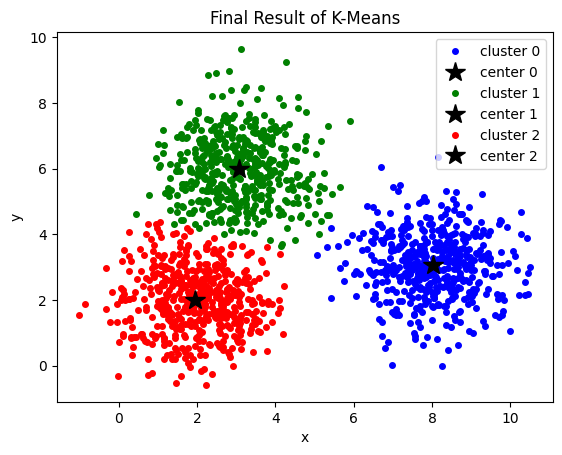

In [19]:

init_centers = kmeans_init_centers(X, n_cluster)
init_labels = np.zeros(X.shape[0])

centers, labels, times = kmeans(init_centers, init_labels, X, n_cluster)

print('Done! Kmeans has converged after', times, 'times')
kmeans_visualize(X, centers, labels, n_cluster, 'Final Result of K-Means')

# Tạo dữ liệu mẫu với `make_blobs`
Hàm `make_blobs` của thư viện `sklearn.datasets` tạo ra các điểm dữ liệu phân loại với nhiều trung tâm (centers). Dữ liệu này sẽ được dùng để huấn luyện và kiểm tra mô hình KNN.

- **`n_samples`**: Số lượng mẫu (500 mẫu).
- **`n_features`**: Số lượng đặc trưng cho mỗi mẫu (2 đặc trưng).
- **`centers`**: Số lượng trung tâm (4 trung tâm).
- **`cluster_std`**: Độ phân tán của các cụm.
- **`random_state`**: Đảm bảo kết quả tái tạo được.

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import ipywidgets as widgets
from IPython.display import display


X, y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1, random_state=4)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)









# Tìm giá trị K tối ưu bằng `GridSearchCV`
`GridSearchCV` là một công cụ tìm kiếm tham số trong `sklearn` giúp xác định giá trị tối ưu của tham số mô hình, ở đây là tham số `n_neighbors` của KNN.

- **`param_grid`**: Làm việc với tham số `n_neighbors` trong khoảng từ 1 đến 15.
- **`cv`**: Số lượng phân chia (cross-validation) cho việc đánh giá mô hình.

In [36]:

param_grid = {'n_neighbors': np.arange(1, 15)}
knn_grid = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv=5)
knn_grid.fit(X_train, y_train)
best_k = knn_grid.best_params_['n_neighbors']




# Hàm KNN thủ công

Hàm `manual_KNN_predict` thực hiện dự đoán bằng phương pháp KNN (K-Nearest Neighbors) thủ công. Cách hoạt động của hàm:

1. **Tính toán khoảng cách**: Tính khoảng cách Euclidean giữa điểm cần dự đoán và tất cả các điểm trong bộ huấn luyện.
2. **Chọn K điểm gần nhất**: Lựa chọn K điểm có khoảng cách nhỏ nhất.
3. **Dự đoán nhãn**: Đếm số lần xuất hiện của các nhãn trong K điểm gần nhất và chọn nhãn phổ biến nhất.

# Vẽ biểu đồ KNN

Hàm `plot_knn_decision_boundary` sẽ vẽ đường biên quyết định (decision boundary) của mô hình KNN. Đây là cách mà mô hình phân chia không gian thành các vùng tương ứng với các lớp khác nhau.

- **Kết quả**: Đoạn mã vẽ quyết định biên cho mô hình KNN với các điểm dữ liệu huấn luyện và kiểm tra được thể hiện trên biểu đồ.



In [39]:

# 3. KNN thủ công
def manual_KNN_predict(X_train, y_train, X_input, k):
    distances = np.linalg.norm(X_input[:, None] - X_train, axis=2)
    sorted_idx = np.argsort(distances, axis=1)[:, :k]
    topk_labels = y_train[sorted_idx]

    preds = []
    for row in topk_labels:
        labels, counts = np.unique(row, return_counts=True)
        preds.append(labels[counts.argmax()])
    return np.array(preds)


# 4. Vẽ đồ thị
def plot_KNN(k):
    y_pred = manual_KNN_predict(X_train, y_train, X_test, k)
    acc = accuracy_score(y_test, y_pred)

    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF', '#FFFFAA'])
    cmap_bold  = ListedColormap(['#FF0000', '#00FF00', '#0000FF', '#EEEE00'])

    h = 0.05
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, y_train)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    plt.figure(figsize=(10, 6))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.title(f"KNN với K={k} | Accuracy={acc*100:.2f}% | Best K={best_k}")
    plt.show()


# 5. Slider chọn giá trị K
k_slider = widgets.IntSlider(
    value=best_k,
    min=1,
    max=20,
    step=1,
    description='Chọn K:',
    continuous_update=False
)

widgets.interact(plot_KNN, k=k_slider)

interactive(children=(IntSlider(value=2, continuous_update=False, description='Chọn K:', max=20, min=1), Outpu…

<function __main__.plot_KNN(k)>